In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import cross_val_score

In [5]:
zoo=pd.read_csv("Zoo.csv")
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [6]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [7]:
zoo.tail()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


# Data exploration and visualization

<AxesSubplot:>

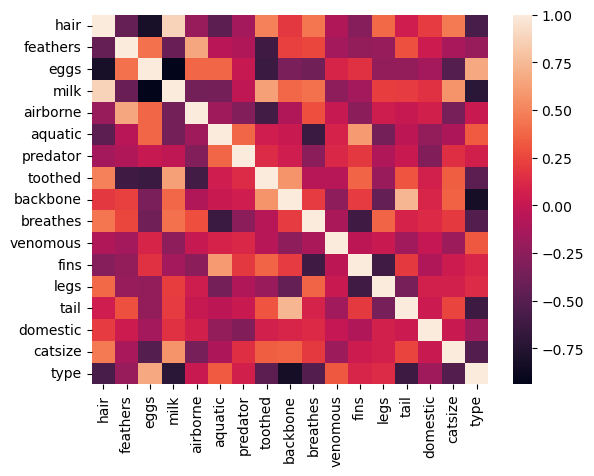

In [8]:
cor=zoo.corr()
sns.heatmap(cor)

In [9]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [10]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [11]:
zoo.drop('animal name',axis=1,inplace=True)

In [12]:
color_list=[('red' if i ==1 else 'blue' if i ==0 else 'yellow') for i  in zoo.hair]

In [13]:
unique_list=list(set(color_list))
unique_list

['red', 'blue']

# Plotting scatter matrix

array([[<AxesSubplot:xlabel='hair', ylabel='hair'>,
        <AxesSubplot:xlabel='feathers', ylabel='hair'>,
        <AxesSubplot:xlabel='eggs', ylabel='hair'>,
        <AxesSubplot:xlabel='milk', ylabel='hair'>,
        <AxesSubplot:xlabel='airborne', ylabel='hair'>,
        <AxesSubplot:xlabel='aquatic', ylabel='hair'>],
       [<AxesSubplot:xlabel='hair', ylabel='feathers'>,
        <AxesSubplot:xlabel='feathers', ylabel='feathers'>,
        <AxesSubplot:xlabel='eggs', ylabel='feathers'>,
        <AxesSubplot:xlabel='milk', ylabel='feathers'>,
        <AxesSubplot:xlabel='airborne', ylabel='feathers'>,
        <AxesSubplot:xlabel='aquatic', ylabel='feathers'>],
       [<AxesSubplot:xlabel='hair', ylabel='eggs'>,
        <AxesSubplot:xlabel='feathers', ylabel='eggs'>,
        <AxesSubplot:xlabel='eggs', ylabel='eggs'>,
        <AxesSubplot:xlabel='milk', ylabel='eggs'>,
        <AxesSubplot:xlabel='airborne', ylabel='eggs'>,
        <AxesSubplot:xlabel='aquatic', ylabel='eggs'>],
    

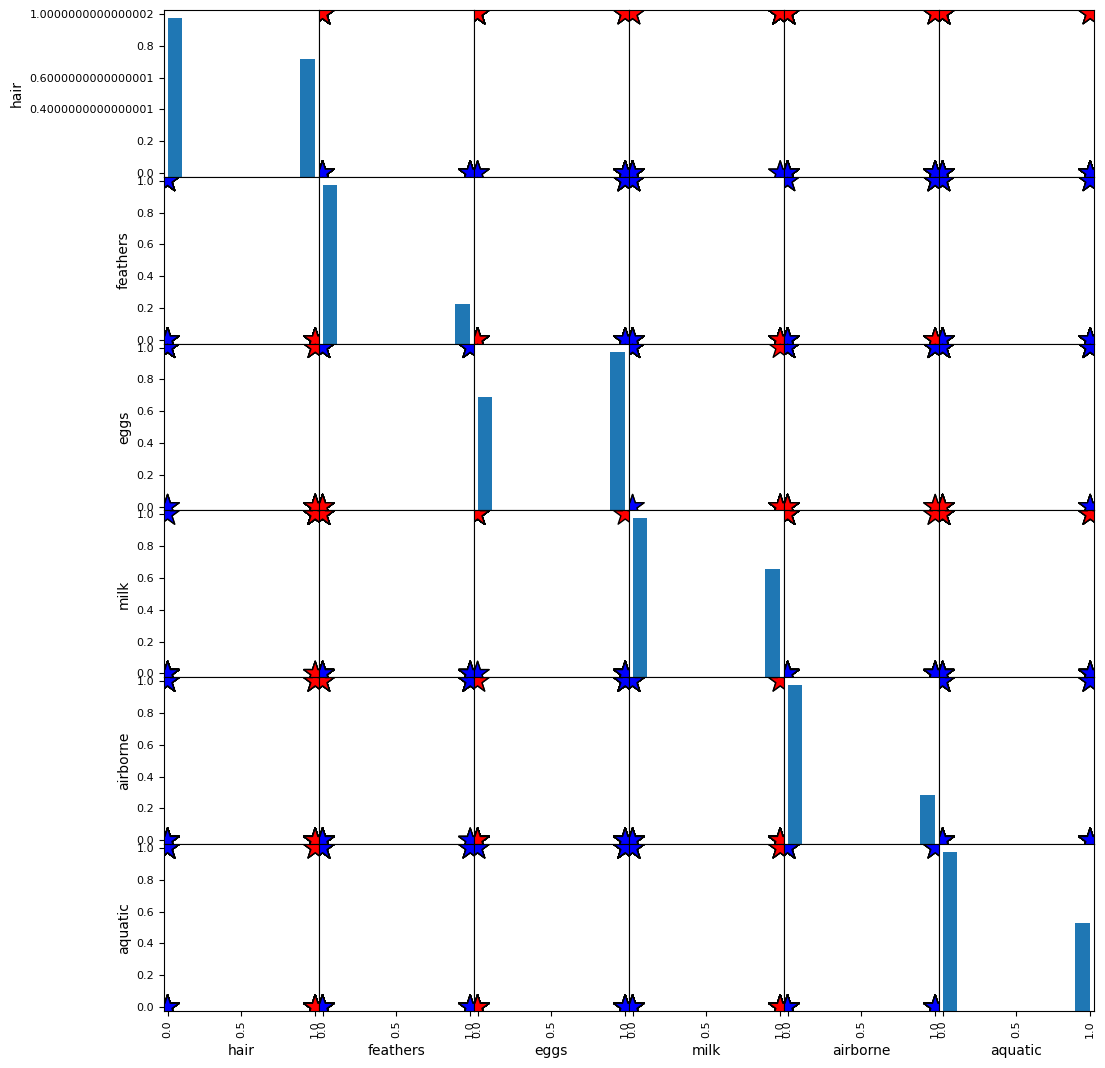

In [14]:
pd.plotting.scatter_matrix(zoo.iloc[:,:6],c=color_list,figsize=[12,13],diagonal='hist',alpha=1,s=300,marker='*',edgecolor='black')

# Visualizing has hair or not

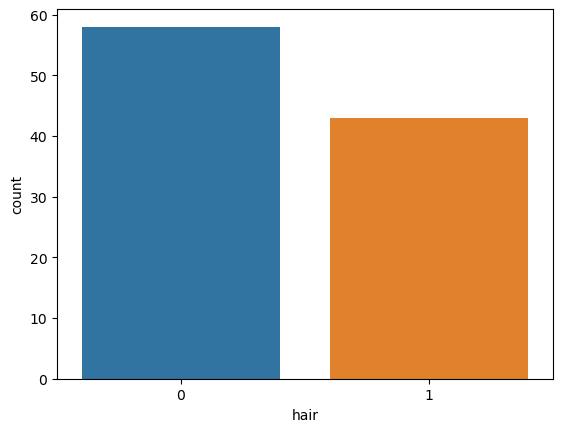

0    58
1    43
Name: hair, dtype: int64

In [15]:
sns.countplot(x='hair',data=zoo)
plt.xlabel('hair')
plt.ylabel('count')
plt.show()
zoo.loc[:,'hair'].value_counts()

# KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
x,y=zoo.loc[:,zoo.columns!='hair'],zoo.loc[:,'hair']
knn.fit(x,y)
prediction=knn.predict(x)
print('prediction = ',prediction)

prediction =  [1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1
 0 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0]


D:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
knn=KNeighborsClassifier(n_neighbors=1)
x,y=zoo.loc[:,zoo.columns!='hair'],zoo.loc[:,'hair']
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)
print('with KNN (k=1) accuracy is :',knn.score(x_test,y_test))

with KNN (k=1) accuracy is : 0.967741935483871


D:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

D:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

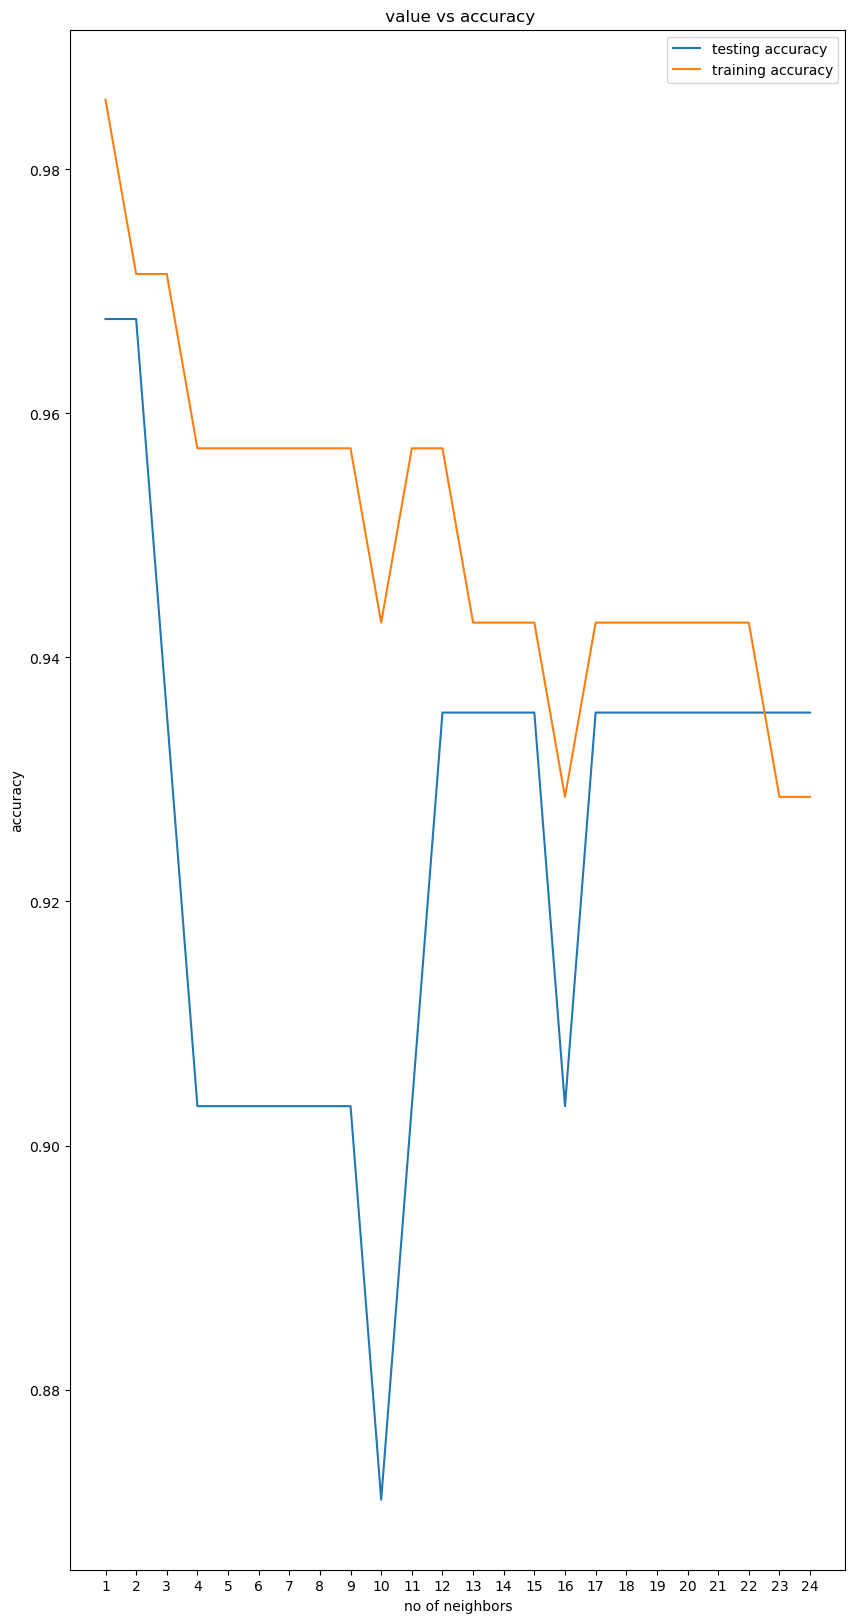

In [29]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train,y_train))
    test_accuracy.append(knn.score(x_test,y_test))
    
plt.figure(figsize=[10,20])
plt.plot(k_values,test_accuracy,label='testing accuracy')
plt.plot(k_values,train_accuracy,label='training accuracy')
plt.legend()
plt.title(' value vs accuracy')
plt.xlabel('no of neighbors')
plt.ylabel('accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()

# Visualizing eggs and hair on Scatter

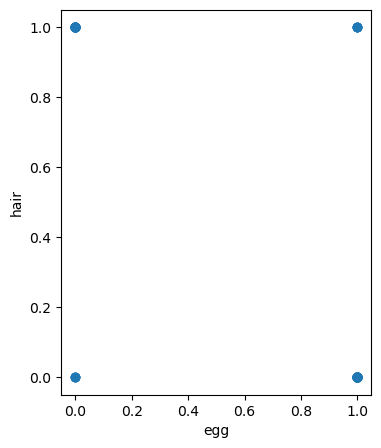

In [32]:
x=np.array(zoo.loc[:,'eggs']).reshape(-1,1)
y=np.array(zoo.loc[:,'hair']).reshape(-1,1)
plt.figure(figsize=[4,5])
plt.scatter(x=x,y=y)
plt.xlabel('egg')
plt.ylabel('hair')
plt.show()

R^2 score : 0.6681125904754137


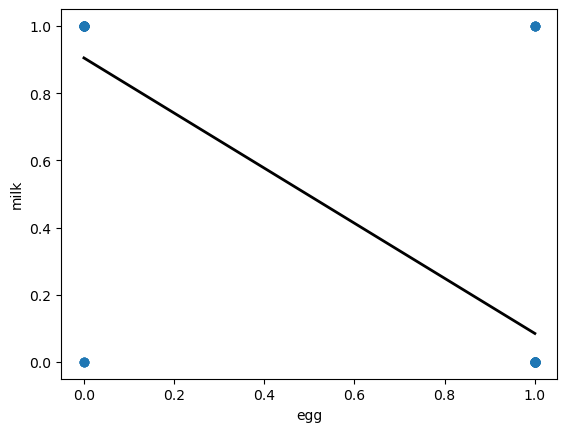

In [37]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
predict_space=np.linspace(min(x),max(x)).reshape(-1,1)
regression.fit(x,y)
predicted=regression.predict(predict_space)
print('R^2 score :',regression.score(x,y))
plt.plot(predict_space,predicted,color='black',linewidth=2)
plt.scatter(x=x,y=y)
plt.xlabel('egg')
plt.ylabel('milk')
plt.show()

# Cross validation

In [39]:
from sklearn.model_selection import cross_val_score
regression=LinearRegression()
k=8
cv_result=cross_val_score(regression,x,y,cv=k)
print('cv scores:',cv_result)
print('cv average:',np.sum(cv_result)/k)

cv scores: [ 0.95008209  0.4279831   0.95517217 -0.03048829  0.66238575  0.02708972
  0.85940824  0.67885585]
cv average: 0.5663110784747889


# Ridge

In [40]:
from sklearn.linear_model import Ridge
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=0.3)
ridge=Ridge(alpha=0.001,normalize=True)
ridge.fit(x_train,y_train)
ridge_predict=ridge.predict(x_test)
print('Ridge score :',ridge.score(x_test,y_test))

D:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Ridge score : 0.9302397279928529


# Lasso

In [44]:
from sklearn.linear_model import Lasso
x=np.array(zoo.loc[:,['eggs','airborne','fins','legs','hair','type']])
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3,test_size=0.3)
lasso=Lasso(alpha=0.001,normalize=True)
lasso.fit(x_train,y_train)
lasso_predict=lasso.predict(x_test)
print('Lasso score :',lasso.score(x_test,y_test))
print('Lasso coef :',lasso.coef_)

Lasso score : 0.9997098993222184
Lasso coef : [-0.         -0.         -0.          0.          0.98301537 -0.        ]


D:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [50]:
from sklearn.metrics import classification_report ,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
x,y=zoo.loc[:,zoo.columns!='hair'],zoo.loc[:,'hair']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
rf=RandomForestClassifier(random_state=4)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print('confution matrix:' ,cm)
print('classification report:',classification_report(y_test,y_pred))

confution matrix: [[15  0]
 [ 0 16]]
classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        16

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



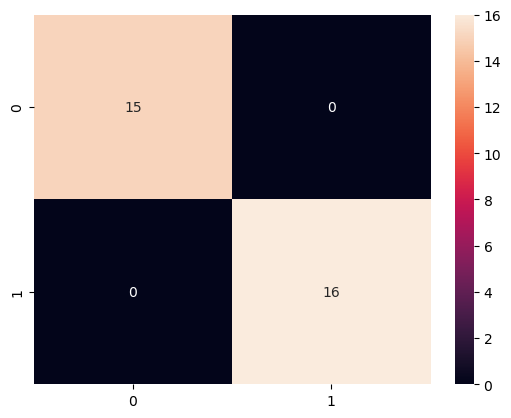

In [52]:
sns.heatmap(cm,annot=True,fmt='d')
plt.show()

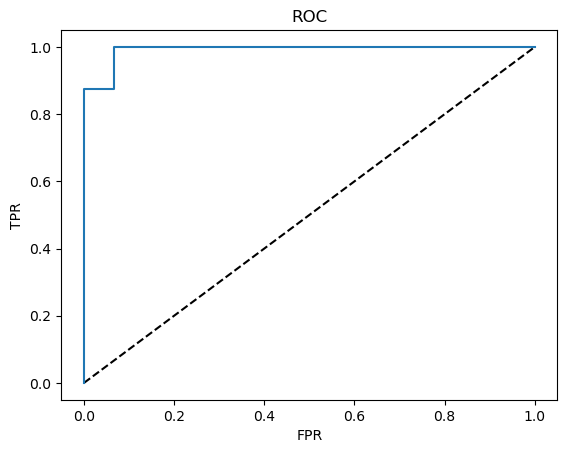

In [53]:
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report ,confusion_matrix
x,y=zoo.loc[:,zoo.columns!='hair'],zoo.loc[:,'hair']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_prob =logreg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()